In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/processed_data/sales_2019.csv', parse_dates=['OrderDate'])

In [6]:
df.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Sales,Hour,Month,Day,DayName,Year,StreetAddress,CityName,ZipAddress,StreetName,StreetNumber,ZipCode,StateCode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,8,4,19,Friday,2019,917 1st St,Dallas,TX 75001,1st St,917,75001,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,22,4,7,Sunday,2019,682 Chestnut St,Boston,MA 02215,Chestnut St,682,2215,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,14,4,12,Friday,2019,669 Spruce St,Los Angeles,CA 90001,Spruce St,669,90001,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,14,4,12,Friday,2019,669 Spruce St,Los Angeles,CA 90001,Spruce St,669,90001,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,9,4,30,Tuesday,2019,333 8th St,Los Angeles,CA 90001,8th St,333,90001,CA


In [7]:
df.shape

(185950, 19)

In [90]:
df.sort_values(by='OrderDate', inplace=True)

In [8]:
df.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Sales
6317,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99
7124,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95
8471,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00
9122,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99
8478,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90


In [9]:
df.isna().sum()

OrderID            0
Product            0
QuantityOrdered    0
PriceEach          0
OrderDate          0
PurchaseAddress    0
Sales              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 6317 to 166037
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   OrderID          185950 non-null  int64         
 1   Product          185950 non-null  object        
 2   QuantityOrdered  185950 non-null  int64         
 3   PriceEach        185950 non-null  float64       
 4   OrderDate        185950 non-null  datetime64[ns]
 5   PurchaseAddress  185950 non-null  object        
 6   Sales            185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 11.3+ MB


In [2]:
df =  pd.read_excel('df_Salesfinal.xlsx')


In [15]:
title_text = "PRODUCT VS QUANTITY ORDERED"

display(title_text)

<center><span style='color:red'>PRODUCT VS QUANTITY ORDERED</span></center>

In [16]:
df.groupby('Product')['QuantityOrdered'].agg(['sum'])

,sum
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [7]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [8]:
# Groupement par produit et somme de la quantité, tri par ordre décroissant
df_grouped = df.groupby('Product')['QuantityOrdered'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='QuantityOrdered', ascending=True)

# Créer une source de données Bokeh
source = ColumnDataSource(df_grouped)

# Créer un diagramme en barres avec Bokeh (inverser l'axe)
p = figure(y_range=df_grouped['Product'], height=400, width=600, title="Total Quantity Ordered per Product",
           toolbar_location="right", tools="pan,box_zoom,wheel_zoom,reset,save", x_axis_label="Total Quantity Ordered", y_axis_label="Product")
p.grid.visible = False

# Créer le diagramme en barres
p.hbar(y='Product', right='QuantityOrdered', source=source, height=0.4, color="blue")


# Afficher le diagramme en barres avec Bokeh dans le notebook
output_notebook()
show(p)

Loading BokehJS ...

In [2]:

title_text = "PRODUCT VS PRICE"

display(title_text)

'PRODUCT VS PRICE'

In [21]:
df.groupby('Product')['PriceEach'].first().to_frame()

,PriceEach
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [9]:
# Obtenir les premières valeurs de la colonne 'Price' pour chaque produit
df_first_price = df.groupby('Product')['PriceEach'].first().reset_index()
df_first_price = df_first_price.sort_values(by='PriceEach', ascending=True)
# Créer une source de données Bokeh
source = ColumnDataSource(df_first_price)

# Créer un diagramme en barres avec Bokeh
p = figure(y_range=df_first_price['Product'], height=400, width=600, title="Price per Product",
           toolbar_location="right", tools="pan,box_zoom,wheel_zoom,reset,save", x_axis_label="Price", y_axis_label="Product")

# Créer le diagramme en barres
bars = p.hbar(y='Product', right='PriceEach', source=source, height=0.4, color="red")
p.grid.visible = False

# Afficher le diagramme en barres avec Bokeh dans le notebook
output_notebook()
show(p)


Loading BokehJS ...

In [27]:
title_text = "PRODUCT VS SALES"

display(title_text)

<center><span style='color:red'>PRODUCT VS SALES</span></center>

In [29]:
df.groupby('Product')['Sales'].sum().to_frame()

,Sales
Product,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


In [10]:
# Groupement par produit et somme de la quantité, tri par ordre décroissant
df_sales = df.groupby('Product')['Sales'].sum().reset_index()
df_sales = df_sales.sort_values(by='Sales', ascending=True)

# Créer une source de données Bokeh
source = ColumnDataSource(df_sales)

# Créer un diagramme en barres avec Bokeh (inverser l'axe)
p = figure(y_range=df_sales['Product'], height=400, width=600, title="Total Sales per Product",
           toolbar_location="right", tools="pan,box_zoom,wheel_zoom,reset,save", x_axis_label="Total Sales", y_axis_label="Product")
p.grid.visible = False

# Créer le diagramme en barres
p.hbar(y='Product', right='Sales', source=source, height=0.4, color="mediumblue")


# Afficher le diagramme en barres avec Bokeh dans le notebook
output_notebook()
show(p)

Loading BokehJS ...

In [3]:
title_text = "PRODUCT VS CITY"

display(title_text)

'PRODUCT VS CITY'

In [58]:
df.groupby(['Product', 'City'])['QuantityOrdered'].sum().to_frame()

QuantityOrdered
Product      City                          
20in Monitor Atlanta                    342
             Austin                     230
             Boston                     394
             Dallas                     343
             Los Angeles                658
...                                     ...
iPhone       Los Angeles               1118
             New York City              881
             Portland                   450
             San Francisco             1661
             Seattle                    546

[171 rows x 1 columns]

In [57]:
df.groupby(['Product', 'City'])['Sales'].sum().to_frame()

Sales
Product      City                     
20in Monitor Atlanta          37616.58
             Austin           25297.70
             Boston           43336.06
             Dallas           37726.57
             Los Angeles      72373.42
...                                ...
iPhone       Los Angeles     782600.00
             New York City   616700.00
             Portland        315000.00
             San Francisco  1162700.00
             Seattle         382200.00

[171 rows x 1 columns]

In [60]:
df_cityQ=df.groupby(['City'])['QuantityOrdered'].sum().to_frame()

In [61]:
df_cityQ

,QuantityOrdered
City,
Atlanta,16602
Austin,11153
Boston,22528
Dallas,16730
Los Angeles,33289
New York City,27932
Portland,14053
San Francisco,50239
Seattle,16553


In [62]:
df_citySales=df.groupby(['City'])['Sales'].sum().to_frame()


In [63]:
df_citySales

,Sales
City,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


In [11]:
# Groupement par produit et somme de la quantité, tri par ordre décroissant
df_cityQ = df.groupby('City')['QuantityOrdered'].sum().reset_index()
df_cityQ = df_cityQ.sort_values(by='QuantityOrdered', ascending=True)

# Créer une source de données Bokeh
source = ColumnDataSource(df_cityQ)

# Créer un diagramme en barres avec Bokeh (inverser l'axe)
p = figure(y_range=df_cityQ['City'], height=400, width=600, title="Total Quantity per City",
           toolbar_location="right", tools="pan,box_zoom,wheel_zoom,reset, save", x_axis_label="Total Quantity", y_axis_label="City")
p.grid.visible = False

# Créer le diagramme en barres
p.hbar(y='City', right='QuantityOrdered', source=source, height=0.4, color="mediumblue")


# Afficher le diagramme en barres avec Bokeh dans le notebook
output_notebook()
show(p)

Loading BokehJS ...

In [76]:
# Groupement par produit et somme de la quantité, tri par ordre décroissant
df_citySales = df.groupby('City')['Sales'].sum().reset_index()
df_citySales = df_citySales.sort_values(by='Sales', ascending=True)

# Créer une source de données Bokeh
source = ColumnDataSource(df_citySales)

# Créer un diagramme en barres avec Bokeh (inverser l'axe)
p = figure(y_range=df_citySales['City'], height=400, width=600, title="Total Sales per City",
           toolbar_location="right", tools="pan,box_zoom,wheel_zoom,reset,save", x_axis_label="Total Sales", y_axis_label="City")
p.grid.visible = False

# Créer le diagramme en barres
p.hbar(y='City', right='Sales', source=source, height=0.4, color="pink")


# Afficher le diagramme en barres avec Bokeh dans le notebook
output_notebook()
show(p)

Loading BokehJS ...

In [100]:
df.groupby(['Month'])['Sales'].sum().to_frame()

,Sales
Month,
April,3390670.24
August,2244467.88
December,4613443.34
February,2202022.42
January,1822256.73
July,2647775.76
June,2577802.26
March,2807100.38
May,3152606.75


In [115]:
df_MonthSales= df.groupby(['Month'])['Sales'].sum().reset_index()


In [116]:
df_MonthSales

,Month,Sales
0,April,3390670.24
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,2807100.38
8,May,3152606.75
9,November,3199603.20


In [12]:
# Your sales data
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sales = [1822256.73, 2202022.42, 2807100.38, 3390670.24, 3152606.75, 2577802.26, 2647775.76, 2244467.88, 2097560.13, 3736726.88, 3199603.20, 4613443.34]

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(months=months, sales=sales))

# Create the plot
p = figure(x_range=months, height=350, title="Monthly Sales", toolbar_location='right', tools="pan,box_zoom,wheel_zoom,reset,save", x_axis_label="Month")

# Add a line renderer
p.line(x='months', y='sales', line_width=2, source=source)
p.grid.visible = False
# Customize the plot
p.yaxis.axis_label = "Sales"
p.xaxis.major_label_orientation = 1.2

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

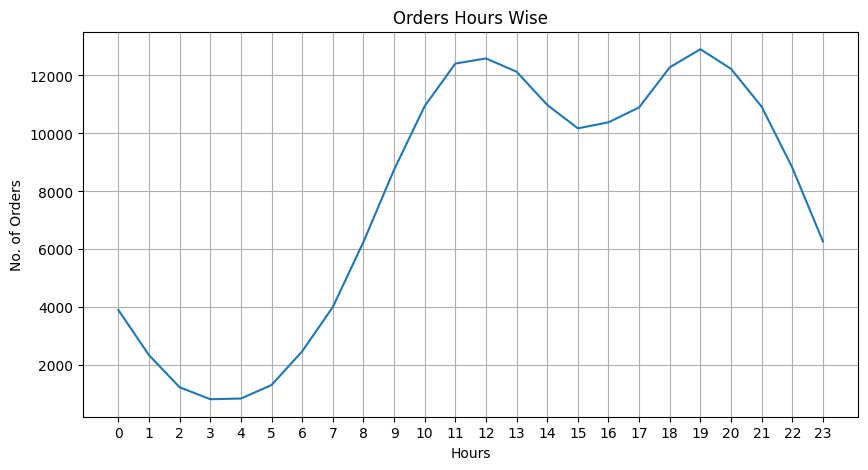

In [20]:
# visualizing the data order time
order_time = df.Hour.value_counts().sort_index()

# line plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=order_time)

# labelling the plot
plt.xticks(order_time.index)
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.title('Orders Hours Wise')
plt.grid()
plt.show()

In [22]:
citySales = df.groupby(['City']).agg({'QuantityOrdered' : 'sum',  'Sales' : 'sum'}).reset_index()
citySales.dtypes

City                object
QuantityOrdered      int64
Sales              float64
dtype: object

In [25]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geocoder
import geopy


mp = folium.Map(location=[41,-99], zoom_start=3.5)

loc =[]

citylist = df.City.unique().tolist()
for i in citylist:
    geo = geocoder.arcgis(i)
    val = citySales.loc[citySales['City'] ==i]['Sales'].item()
    loc.append([geo.lat, geo.lng,val ])
    folium.Marker([geo.lat,geo.lng],
                  opacity=0,
                  tooltip = ('<body>City: {} <br> Sales: {}M</body>'.format(i, round(val/1000000,3)))).add_to(mp)
    
HeatMap(loc).add_to(mp)
folium.LayerControl().add_to(mp)


mp